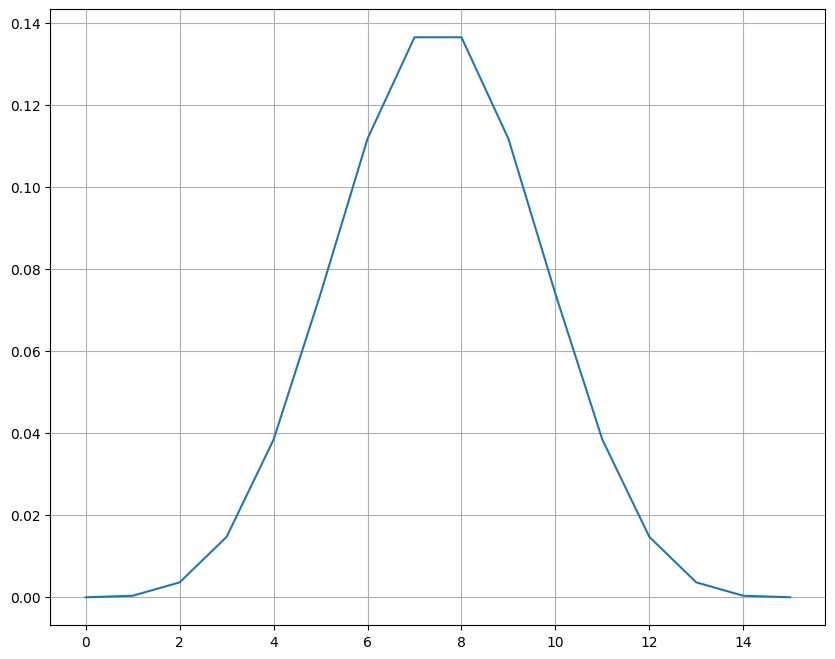

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat array dari 0 sampai 15, total 16 angka
n = np.arange(16)

# Membuat fungsi impulse response h[n] dari filter FIR dengan menggunakan fungsi sinus
# Disesuaikan dengan rumus h[n] = sin(0.14π(n-7.5)) / (π(n-7.5))
h = np.sin(0.14 * np.pi * (n - 7.5)) / (np.pi * (n - 7.5))

# Membuat window dengan fungsi Kaiser dengan panjang 16 dan parameter beta sebesar 8
hk = np.kaiser(16, 8)

# Melakukan konvolusi antara impulse response h[n] dengan window hk untuk mendapatkan filter response
hfilt = hk * h

# Membuat plot
plt.figure(figsize=(10, 8))
plt.plot(hfilt)  # Plot filter response
plt.grid()  # Menambahkan grid pada plot


Gambar diatas menggambarkan sebuah grafik dengan kurva berbentuk lonceng, yang dikenal sebagai distribusi Gaussian atau kurva distribusi normal. Sumbu x diberi label dengan angka mulai dari 0 hingga 14, sedangkan sumbu y berkisar dari 0 hingga 0,14 dengan peningkatan sebesar 0,02. Puncak dari kurva berada di sekitar nilai 8 pada sumbu x, menunjukkan bahwa ini mungkin merupakan rata-rata atau modus dari data yang direpresentasikan oleh kurva tersebut. Kurva ini simetris, menunjukkan bahwa distribusi data tersebut merata di kedua sisi puncaknya.

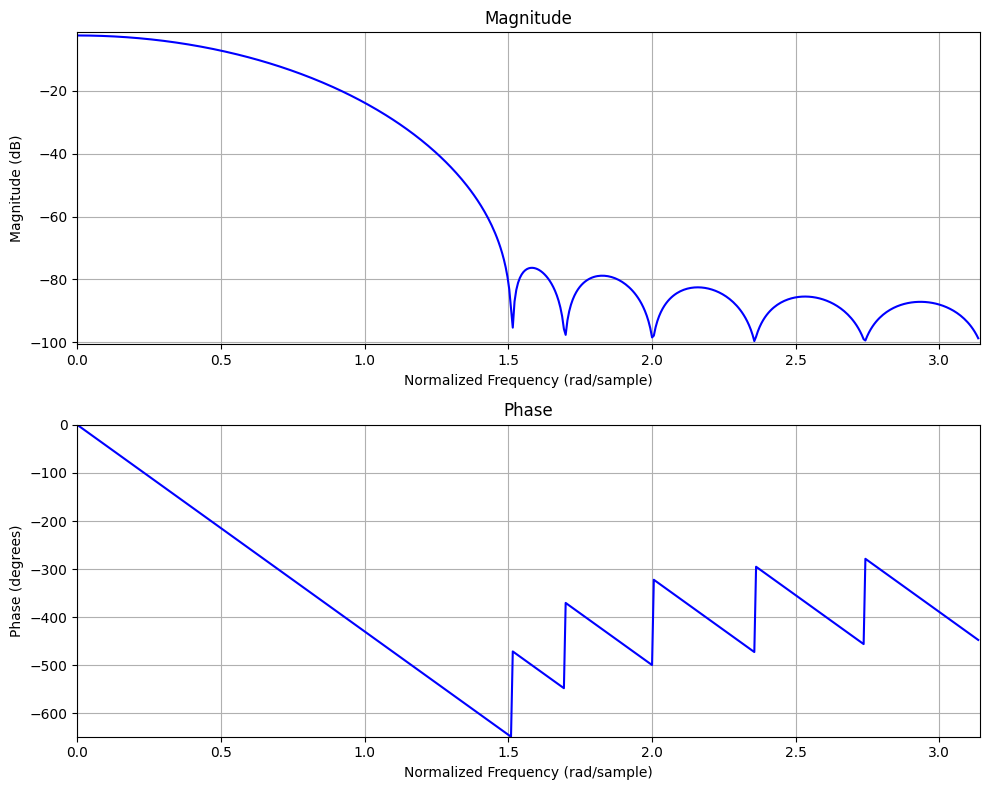

In [ ]:
import scipy.signal as signal

def freqz(x):
    # Mendapatkan respons frekuensi dari sinyal menggunakan fungsi freqz dari modul scipy.signal
    # f adalah array yang berisi frekuensi
    # H adalah array kompleks yang berisi nilai magnitude dan fase respons frekuensi
    f, H = signal.freqz(x)

    # Normalisasi frekuensi
    fNorm = f / np.pi

    # Menghitung magnitude dalam dB
    hdB = 20 * np.log10(abs(H) + 1e-5)  # "+1e-5" menghindari log10(0)!

    # Membuka sebuah figure (gambar) untuk menampilkan plot
    plt.figure(figsize=(10, 8))

    # Subplot pertama untuk plot magnitude
    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')  # Plot magnitude dalam dB
    plt.axis([0, np.pi, np.min(hdB) - 1, np.max(hdB) + 1])  # Set batasan sumbu
    plt.grid(True)  # Menambahkan grid
    plt.xlabel('Normalized Frequency (rad/sample)')  # Label sumbu x
    plt.ylabel('Magnitude (dB)')  # Label sumbu y

    # Subplot kedua untuk plot fase
    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))  # Unwrap fase untuk menghindari loncatan yang besar
    anglesGrad = (360 * angles) / (2 * np.pi)  # Konversi fase ke derajat
    plt.plot(f, anglesGrad, 'b')  # Plot fase dalam derajat
    plt.axis([0, np.pi, np.min(anglesGrad), np.max(anglesGrad)])  # Set batasan sumbu
    plt.grid(True)  # Menambahkan grid
    plt.xlabel('Normalized Frequency (rad/sample)')  # Label sumbu x
    plt.ylabel('Phase (degrees)')  # Label sumbu y
    plt.tight_layout()  # Menyesuaikan layout plot

# Memanggil fungsi freqz untuk memplot respons frekuensi dari filter hfilt
freqz(hfilt)


Gambar diatas menunjukkan dua plot yang berkaitan dengan respons frekuensi dari suatu sistem atau filter digital, yang diplot berdasarkan frekuensi yang dinormalisasi (dalam radian per sampel).

Plot Pertama (Atas): Plot ini adalah grafik respons magnitudo. Pada sumbu vertikal (y-axis), magnitudo ditunjukkan dalam desibel (dB), sedangkan pada sumbu horizontal (x-axis) menunjukkan frekuensi yang dinormalisasi. Grafik ini menampilkan ciri khas filter, dimana terjadi penurunan magnitudo pada frekuensi tertentu, yang umumnya menunjukkan frekuensi potong pada filter. Bentuk kurvanya menunjukkan penguatan atau pelemahan di berbagai frekuensi.

Plot Kedua (Bawah): Plot ini adalah grafik fase, yang menunjukkan fase sinyal dalam derajat sebagai fungsi dari frekuensi yang dinormalisasi. Sumbu vertikal (y-axis) adalah fase dalam derajat dan sumbu horizontal (x-axis) adalah frekuensi yang dinormalisasi. Grafik fase menunjukkan bagaimana fase sinyal berubah terhadap frekuensi. Perubahan tajam dalam fase sering terjadi di sekitar frekuensi tempat magnitudo mengalami penurunan besar, yang dapat terkait dengan karakteristik fase dari filter.

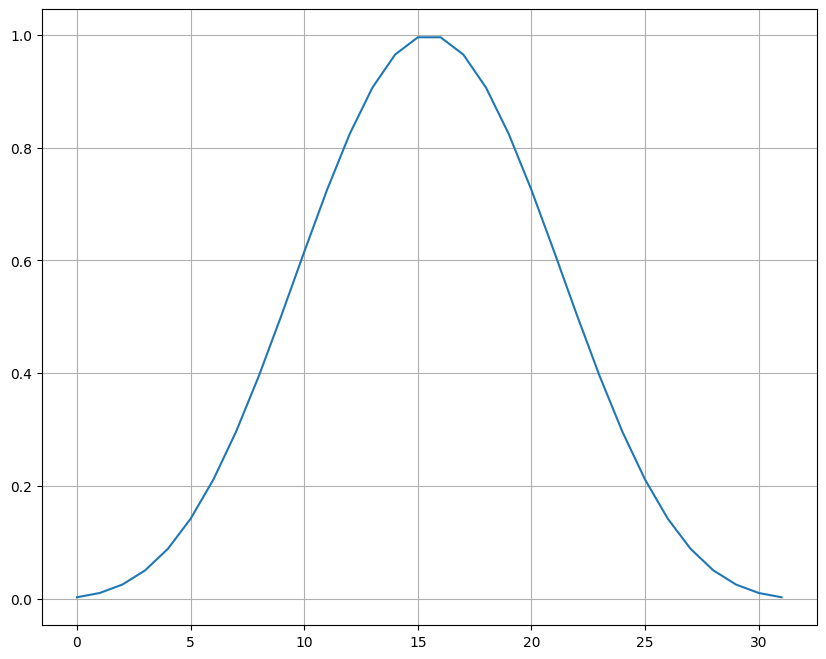

In [ ]:
hk=np.kaiser(32,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Gambar diatas menunjukkan kurva berbentuk lonceng, yang biasanya mewakili distribusi normal dalam statistik. Grafik ini menampilkan kurva pada sistem koordinat dengan sumbu x berkisar dari 0 hingga 30 dan sumbu y dari 0 hingga 1. Puncak kurva terlihat berada di sekitar nilai 15 pada sumbu x, menunjukkan bahwa ini mungkin adalah mean dari distribusi tersebut. Distribusi ini sering digunakan untuk mewakili variabel yang terjadi secara alami yang cenderung berkumpul di sekitar nilai mean, seperti tinggi badan atau skor ujian, dengan asumsi penyebaran data yang simetris di sekitar mean.

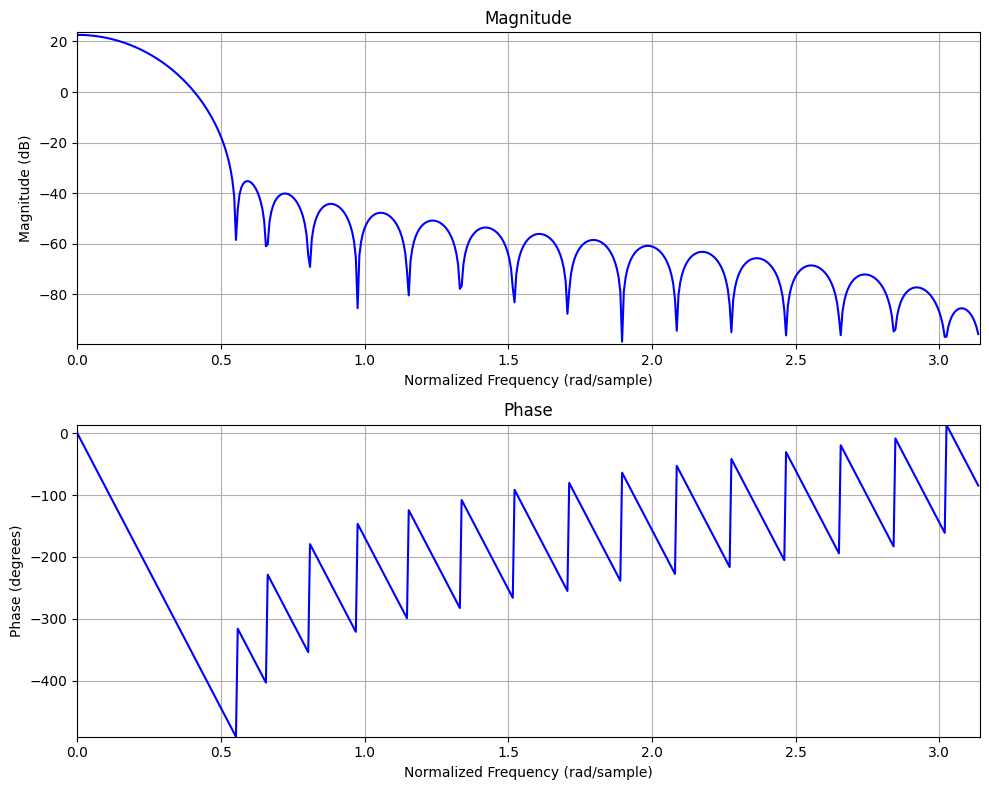

In [ ]:
freqz(hk)

Gambar menunjukkan dua grafik yang berhubungan dengan analisis frekuensi sinyal dalam konteks pemrosesan sinyal atau sistem komunikasi.

Grafik Magnitude (atas):

Sumbu horisontal (X-axis) menunjukkan frekuensi yang dinormalisasi (rad/sample), mencakup rentang dari 0 hingga 3,2.
Sumbu vertikal (Y-axis) menunjukkan magnitude dalam desibel (dB).
Grafik ini menunjukkan cara magnitude dari respons frekuensi suatu sistem atau filter berubah terhadap frekuensi. Terlihat bahwa magnitude menyusut secara tajam pada awal lagi meningkat sampai frekuensi tertentu lalu menurun secara bertahap dengan peningkatan frekuensi.
Puncak dan lembah pada grafik menunjukkan filter ini memiliki beberapa frekuensi resonansi dan notch (penyumbatan).

Grafik Fase (bawah):

Sumbu horisontal dan sumbu vertikal memiliki label yang sama dengan grafik magnitude.
Grafik ini menunjukkan perubahan fase yang terjadi terhadap frekuensi yang dinormalisasi. Fase berubah secara linear di beberapa bagian tetapi memiliki lompatan signifikan pada titik-titik tertentu, yang kemungkinan menandakan adanya fenomena seperti aliasing atau pergeseran fase karena ciri khas filternya.

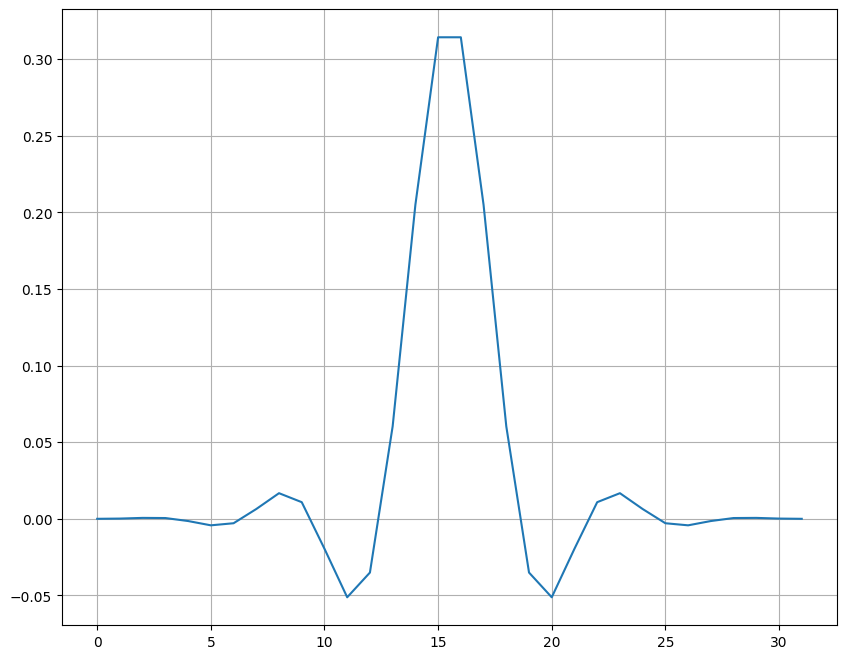

In [ ]:
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8);
#multiply ideal filter and Kaiser window:
hfilt=hk*h;
plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Gambar diatas adalah grafik dengan kisi koordinat. Sumbu horizontal (sumbu x) dilabeli dengan angka yang berkisar dari 0 hingga 30, dan sumbu vertikal (sumbu y) memiliki nilai sekitar -0,05 hingga 0,30. Grafik menampilkan plot garis yang berfluktuasi dan memiliki puncak yang mencolok sekitar 15 pada sumbu x, di mana nilainya mencapai sekitar 0,30 pada sumbu y. Plot garis menunjukkan osilasi kecil di sekitar nol baik sebelum maupun setelah puncak, menunjukkan adanya bentuk perilaku periodik atau noise di sekitar suatu peristiwa sentral penting yang diwakili oleh puncak tersebut.

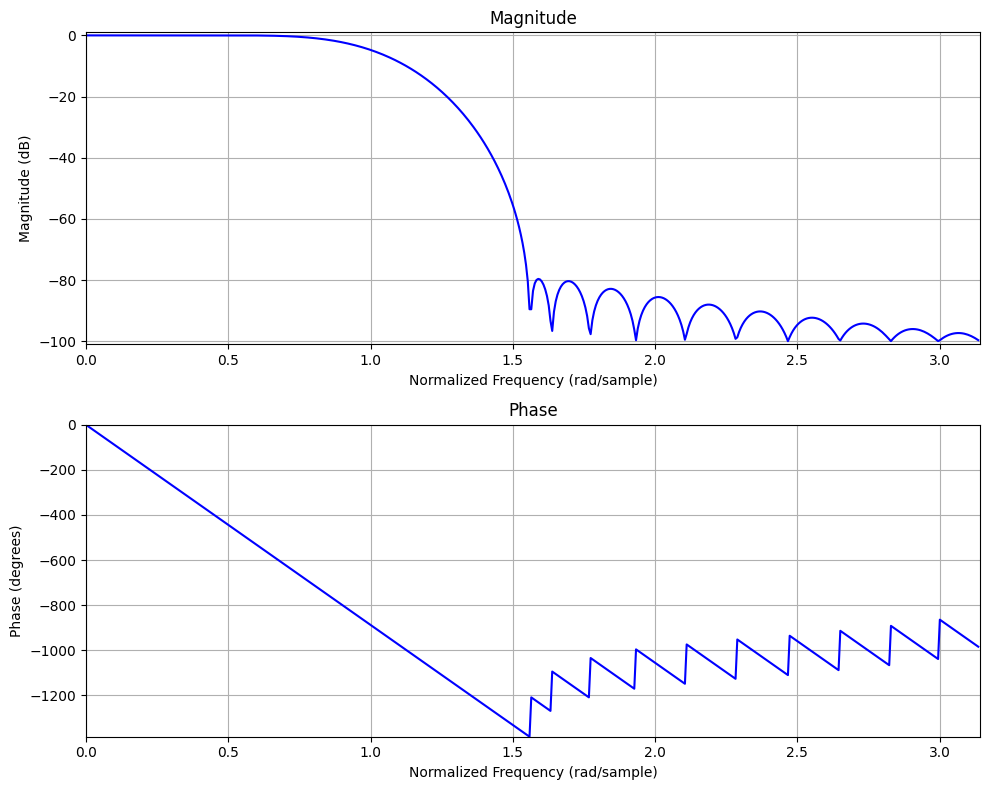

In [ ]:
freqz(hfilt)

Gambar tersebut menunjukkan dua plot yang berhubungan dengan analisis sinyal frekuensi. Plot ini umumnya digunakan dalam pemrosesan sinyal atau sistem komunikasi untuk menganalisis karakteristik filter atau sistem.

Plot Pertama (atas): Ini adalah plot magnitude respons frekuensi. Sumbu horizontal menunjukkan frekuensi yang dinormalisasi dari 0 sampai 3.14 radian per sampel, yang mencerminkan rentang frekuensi dari 0 hingga setengah dari frekuensi sampling. Sumbu vertikal menunjukkan magnitude dalam desibel (dB). Plot ini menggambarkan bagaimana magnitude sinyal berubah terhadap frekuensi. Dari plot ini, kita dapat melihat bahwa ada penurunan magnitude yang tajam di sekitar 0.5 radian per sampel, dikuti oleh fluktuasi kecil dalam magnitude, yang menunjukkan karakteristik seperti filter penyaring atau filter notch.

Plot Kedua (bawah): Ini adalah plot fase dari respons frekuensi. Sumbu horizontal juga menunjukkan frekuensi yang dinormalisasi dari 0 sampai 3.14 radian per sampel. Sumbu vertikal menunjukkan fase dalam derajat. Plot fase menunjukkan bagaimana fase sinyal berubah terhadap frekuensi. Grafik menunjukkan penurunan fase secara linear untuk frekuensi rendah dan kemudian fase menjadi lebih fluktuatif pada frekuensi yang lebih tinggi.

In [ ]:
"""
PyAudio Example: Mix speech with a 1 kHz carrier (i.e., record a
few samples, mix/modulate them with a sine wave, and play them back immediately).
Using block-wise processing
Gerald Schuller, Octtober 2014

--- Modified by Renato Profeta to include GUI, April 2020
"""

# Imports
import pyaudio
import struct
import numpy
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox
import threading

# Parameters
CHUNK = 5000 #Blocksize
WIDTH = 2 #2 bytes per sample
CHANNELS = 1 #2
RATE = 32000  #Sampling Rate in Hz
RECORD_SECONDS = 8

def audio_app(toogle_run):
    while(True):
        if toggle_run.value==True:
            break

        #Reading from audio input stream into data with block length "CHUNK":
        data = (stream.read(CHUNK))
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK, data))
        samples=(list(shorts))

        #start block-wise signal processing:

        #Compute a block/an array of sine samples with 500 Hz:
        s=numpy.sin(2*numpy.pi/RATE*500*numpy.arange(0,CHUNK));
        #multiply/modulate the signal with the sine samples:
        samples=samples*s;
        samples=(numpy.clip(samples, -32000,32000)).astype(int)
        #end signal processing

        #converting from short integers to a stream of bytes in "data":
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream:
        stream.write(data, CHUNK)

# GUI
toggle_run = ToggleButton(description='Stop')
button_start = Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
        toggle_run.disabled=True
toggle_run.observe(on_click_toggle_run, 'value')

box_buttons = HBox([button_start,toggle_run])

# Create a Thread for run_spectrogram function
thread = threading.Thread(target=audio_app, args=(toggle_run,))

# Start Audio Stream
# Create
p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                #input_device_index=10,
                frames_per_buffer=CHUNK)

display(box_buttons)

OSError: [Errno -9996] Invalid output device (no default output device)

In [ ]:
HBox(children=(Button(description='Start', style=ButtonStyle()), ToggleButton(value=False, description='Stop')…

In [ ]:
import numpy as np  # Mengimpor library NumPy untuk operasi matematika

n = np.arange(32)  # Membuat array n dari 0 sampai 31 sebagai indeks waktu (sampel)

# Impulse response ideal:
# Menghitung respons impuls ideal dari filter FIR dengan formula sinus cardinal
h = np.sin(0.33 * np.pi * (n - 15.5)) / (np.pi * (n - 15.5))

# Kaiser window:
# Menggunakan fungsi np.kaiser untuk membuat jendela Kaiser dengan panjang 32 dan faktor β (beta) sebesar 8
hk = np.kaiser(32, 8)

# Mengalikan respons impuls ideal dengan jendela Kaiser:
hfilt = hk * h  # Menghasilkan respons impuls filter FIR yang dihasilkan dengan metode Kaiser window


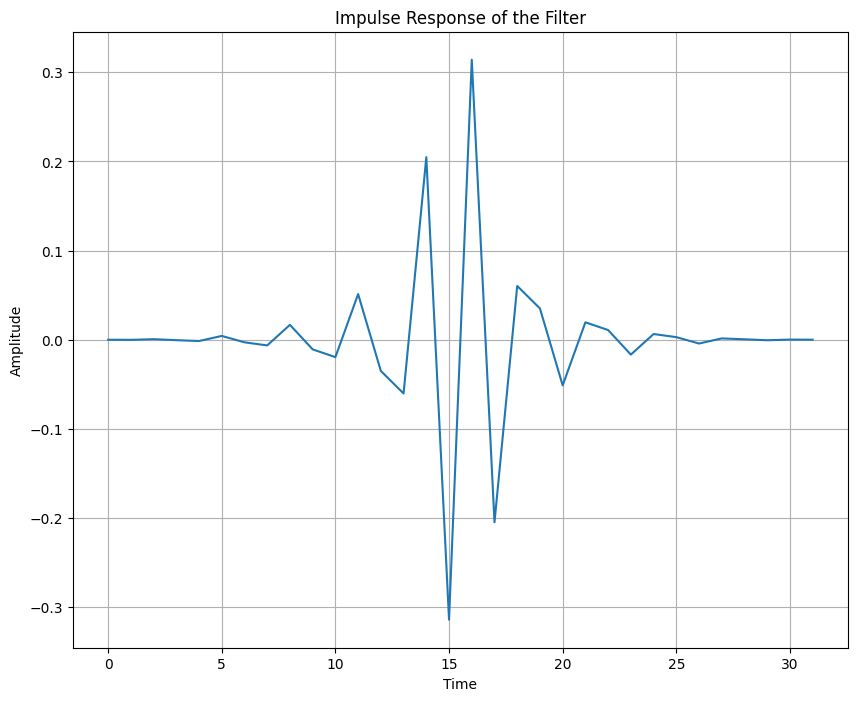

In [ ]:
import matplotlib.pyplot as plt  # Mengimpor modul matplotlib untuk visualisasi data
hp = hfilt * np.cos(np.pi * np.arange(32))  # Menghitung respons impuls filter dengan mengalikan filter dengan kosinus

plt.figure(figsize=(10, 8))  # Membuat gambar (figure) dengan ukuran 10x8 inci
plt.plot(hp)  # Membuat plot dari respons impuls filter
plt.grid()  # Menambahkan grid pada plot

# Menambahkan label dan judul jika diperlukan
plt.xlabel('Time')  # Menambahkan label pada sumbu x (waktu)
plt.ylabel('Amplitude')  # Menambahkan label pada sumbu y (amplitudo)
plt.title('Impulse Response of the Filter')  # Menambahkan judul plot (Respons Impuls dari Filter)

plt.show()  # Menampilkan plot


Gambar tersebut menampilkan grafik garis yang menampilkan perubahan nilai dalam hubungannya dengan suatu variabel, mungkin waktu atau frekuensi. Grafik ini memiliki sumbu y yang berada antara -0.3 hingga 0.3 dan sumbu x yang diberi angka dari 0 hingga 30.

Fokus utama pada grafik tampaknya adalah lonjakan nilai yang terjadi sekitar titik 15 di sumbu x, dimana nilai mencapai puncak positif sekitar 0.3 dan puncak negatif hampir -0.3 dengan cepat. Fluktuasi yang cepat dan tajam ini bisa mengindikasikan peristiwa spesifik atau perubahan signifikan dalam data yang diukur.

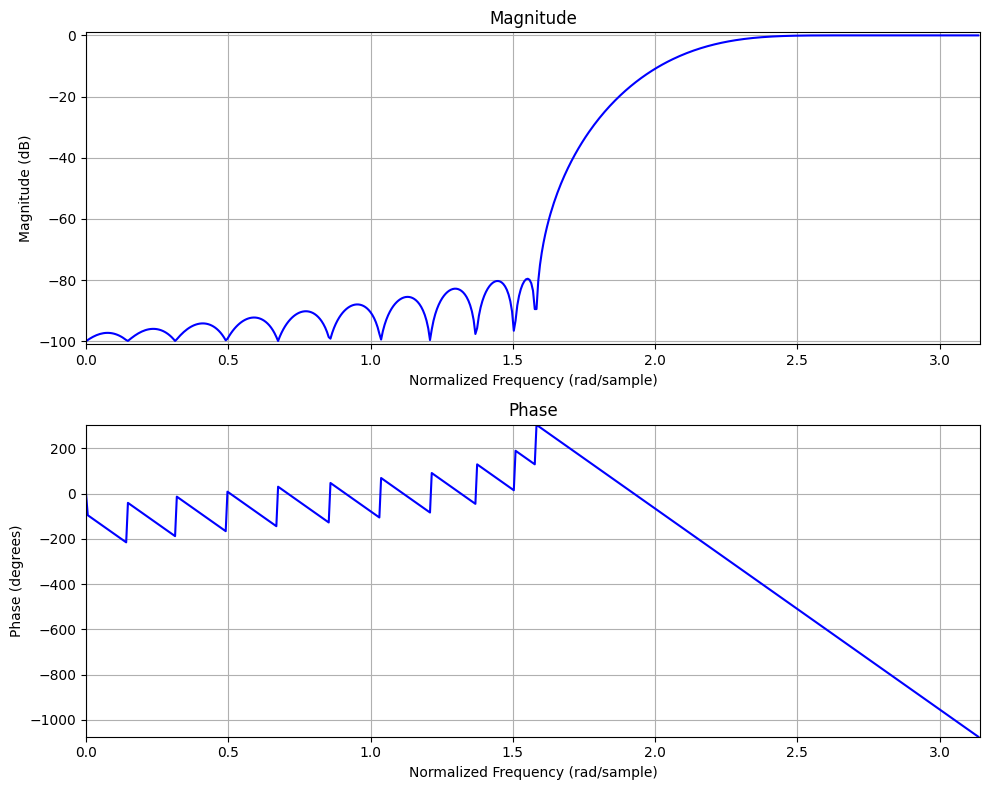

In [ ]:
freqz(hp)

Gambar tersebut menampilkan plot gabungan dari dua grafik yang menggambarkan respon frekuensi dari sebuah sistem atau filter dalam bentuk magnitudo dan fase, relatif terhadap frekuensi ter-normalisasi (dalam radian per sampel).

Bagian Atas (Magnitudo vs. Frekuensi Normalisasi):

Grafik ini adalah plot Magnitude (dalam dB) terhadap Normalized Frequency.
Garis biru menggambarkan bagaimana magnitudo berubah sebagai fungsi dari frekuensi. Magnitudo awalnya tinggi di frekuensi rendah dan secara dramatis menurun pada titik cut-off tertentu sebelum stabil di nilai magnitudo yang rendah. Ini menunjukkan filter yang memiliki karakteristik high-pass atau band-stop.
Bagian Bawah (Fase vs. Frekuensi Normalisasi):

Grafik ini menampilkan Fase (dalam derajat) terhadap Normalized Frequency.
Fase berubah teratur dari 0 derajat dan semakin menurun hingga mendekati -1000 derajat saat frekuensi meningkat. Pola ini mengindikasikan bahwa fase bergeser ke bawah saat frekuensi meningkat, yang umumnya terlihat pada filter digital dengan fase linear atau non-ideal.


In [ ]:
# Menghasilkan koefisien filter highpass dengan modulasi cosine
hbp=hfilt*np.cos(np.pi/2 *np.arange(32))

# Memanggil fungsi freqz dengan menggunakan koefisien filter hbp
freqz(hbp)

Gambar menampilkan dua grafik yang terkait dengan pemrosesan sinyal, khususnya yang menggambarkan besaran dan respons fase dari filter atau sistem digital. Setiap plot memiliki sumbu x dan sumbu y yang diberi label.

Grafik Atas:

Ini adalah plot magnitudo (dalam desibel, dB) terhadap frekuensi yang dinormalisasi (dalam radian per sampel).
Sumbu x berkisar antara 0 hingga 3,0 radian per sampel, dan sumbu y berkisar antara -100 dB hingga 10 dB.
Plot menunjukkan kurva yang dimulai dari dekat 0 dB, menurun seiring dengan peningkatan frekuensi, dan membentuk puncak sekitar 0 radian per sampel. Ini menunjukkan perilaku khas yang ditemukan pada jenis filter tertentu, di mana besarannya berkurang seiring dengan peningkatan frekuensi, yang mencirikan jenis perilaku low-pass.


Grafik Bawah:

Grafik ini menunjukkan respons fase sistem, diukur dalam derajat.
Sumbu x konsisten dengan grafik atas, berkisar antara 0 hingga 3,0 radian per sampel, dan sumbu y membentang dari sekitar -1500 hingga 0 derajat.
Kurva menunjukkan tren penurunan fase seiring dengan meningkatnya frekuensi, yang biasanya menunjukkan pergeseran fase negatif yang meningkat seiring dengan meningkatnya frekuensi.